In [1]:
import os
import sys
p = os.path.dirname(os.path.abspath('../algo-trading'))
sys.path.append(p)

os.chdir('../')
print(os.getcwd())

/Users/benjaminsmith/Developer/algo-trading


In [2]:
import pandas as pd
from pandas_datareader import data as web
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from common.database import QueryDatabase, GetTable
from data_etl.dollar_bars import GetBars
import numpy as np

In [3]:
QueryDatabase("SELECT distinct(symbol), count(*) FROM finnhub_stock_candles_1 GROUP BY 1;")

[('AAN', 1087),
 ('ACDVF', 220),
 ('ACES', 20664),
 ('ACET', 107),
 ('ACRS', 430),
 ('ACY', 43),
 ('ADV', 49753),
 ('AER', 91626),
 ('AEYE', 20703),
 ('AFIB', 40994),
 ('AFRM', 97585),
 ('AG', 108793),
 ('AGC', 54492),
 ('AGMH', 8457),
 ('AIA', 21278),
 ('AINC', 6566),
 ('AIRG', 18762),
 ('AJRD', 59763),
 ('AKUS', 22018),
 ('ALDX', 60349),
 ('ALEC', 58572),
 ('ALGM', 61352),
 ('ALGS', 23076),
 ('ALLO', 73555),
 ('ALLT', 32362),
 ('ALPN', 19668),
 ('ALT', 76460),
 ('ALVR', 35429),
 ('ALXO', 32750),
 ('AMC', 202689),
 ('AMCX', 59143),
 ('AMEH', 38173),
 ('AMKR', 87270),
 ('AMRK', 19136),
 ('AMSC', 48965),
 ('AMSWA', 21724),
 ('AMTI', 28029),
 ('AMTX', 80506),
 ('ANAB', 35499),
 ('ANAT', 14449),
 ('ANGN', 18760),
 ('ANIP', 15592),
 ('ANNX', 25517),
 ('ANVS', 37581),
 ('AOUT', 27625),
 ('APLS', 67235),
 ('APPH', 67999),
 ('APVO', 16094),
 ('APYX', 13991),
 ('ARCT', 70257),
 ('ARL', 3876),
 ('ARQT', 27419),
 ('ARRY', 96675),
 ('ARVL', 61117),
 ('ARVN', 53448),
 ('ASLE', 19077),
 ('ASPS', 17

In [16]:
SYMBOL = 'CERE'

In [18]:
# downsample to every hour, volume bars.
bars = GetBars(SYMBOL, sample_factor=1/60, bar_type='volume', resolution=1)

# use log of prices to make changes over years more comperable
bars['h_log'] = np.log2(bars['h'])
bars['l_log'] = np.log2(bars['l'])
bars['c_log'] = np.log2(bars['c'])

len(bars)

2021-12-03 18:06:35,816 DEBUG    reparsing 47242 bars with 204801932 total volume such that new bars have 260109.98518267644 quantity each.


787

In [55]:
from features.cumsum import getTEvents

# can't do this, because it's not unique. Some bars share the same minute in ts.
#bars.set_index(pd.to_datetime(bars["ts"], unit='s'), inplace=True)

bar_range = max(bars['h_log']) - min(bars['l_log'])

# use log of close, look for changes that are 1/10th of total range
idx = getTEvents(bars['c_log'], bar_range / 10)

# since volume is constant, delta-time will vary. Use up/down movement in delta-time to determine places other players are entering/exiting the market!
bar_range = bars['ts'].diff().fillna(0)
bar_range += min(bar_range.iloc[1:]) # add DC offset so all x >= 0

# 1/2 of delta-time range typically results in a quantity of points > than the c_log points, above.
h = (max(bar_range) - min(bar_range.iloc[1:])) * 0.5

idx2 = getTEvents(bar_range.fillna(0), h)

print(len(idx), len(idx2))

1 0.10263047997378028
2 0.05195207963472148
3 -0.007441383568929094
4 0.1292563716709143
5 0.05150786213286285
6 -0.04131209502697519
7 0.02351359450088708
8 -0.004588595873338264
9 -0.06625893541591932
10 0.04394334758759655
11 0.005082900293226444
12 -0.005082900293226444
13 -0.0016982874720250507
14 -0.006813212383492306
15 0.08776410357160014
16 -0.04818959603075346
17 -0.009583280274877204
18 -0.011331772034369081
19 0.0067258631883131414
20 -0.008412239816199651
21 0.04157910375139906
22 0.024384158626959085
23 0.04053003919828768
24 -0.11835345678670706
25 -0.056379387851315244
26 0.0035338536735611825
27 0.12744144473577812
28 0.04571533597259414
29 -0.013760651109595123
30 0.0007898686432668001
31 0.0
32 -0.022281447376006902
33 0.03955003815271407
34 -0.048398488220878555
35 -0.06266403478217075
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 -0.0375634129564828
42 0.029111748241298585
43 0.0042320213417754715
44 0.0
45 -0.014013042134361164
46 -0.005557877826980473
47 0.04719516766969

712 -0.003258488208230048
713 0.03941815150364825
714 0.017353566750268
715 0.03064314909864141
716 -0.0007677994012453837
717 0.0
718 0.0
719 -0.004808026315356706
720 -0.0055974591838143795
721 0.006175269100445746
722 0.05033387628836472
723 -0.1425705845230345
724 -0.03785289899853872
725 -0.09673861546425666
726 -0.043464847158279696
727 -0.0027896142257013423
728 -0.024405312668277723
729 0.034145454425888566
730 0.0036933013217117505
731 -0.006932714161885123
732 -0.04040373909330519
733 0.08690220119319658
734 -0.03129022788050495
735 -0.0036721497163085814
736 0.031818760699692916
737 -0.0937989217078048
738 -0.027609913437436795
739 0.0
740 0.0
741 0.03478870602826234
742 -0.004302987570365069
743 -0.007200289646603686
744 0.021493950566735975
745 0.023045985410251824
746 0.04365869985300552
747 0.0300152318946747
748 0.011481563832917985
749 0.08829054927125846
750 0.03555327026478672
751 0.02242991384162174
752 0.024042189362496025
753 0.009350473180349539
754 0.07601855417

676 -1740.0
677 77100.0
678 -6540.0
679 -71700.0
680 65220.0
681 -59400.0
682 226380.0
683 -221520.0
684 49020.0
685 -55260.0
686 -4320.0
687 61980.0
688 -57540.0
689 56100.0
690 -65880.0
691 8040.0
692 -300.0
693 67980.0
694 -69720.0
695 240480.0
696 -172020.0
697 -59460.0
698 48060.0
699 -50460.0
700 56400.0
701 -48540.0
702 63240.0
703 249060.0
704 -256260.0
705 6420.0
706 2940.0
707 173040.0
708 -247680.0
709 59040.0
710 -56640.0
711 50520.0
712 -46680.0
713 53520.0
714 -60840.0
715 65400.0
716 -69120.0
717 -8700.0
718 -120.0
719 0.0
720 238620.0
721 -221760.0
722 -13140.0
723 82080.0
724 -19920.0
725 -58320.0
726 -3420.0
727 1920.0
728 -2880.0
729 62700.0
730 -53280.0
731 -4500.0
732 64020.0
733 177960.0
734 -229200.0
735 67020.0
736 -18300.0
737 12600.0
738 -60720.0
739 -20940.0
740 -540.0
741 0.0
742 69780.0
743 185040.0
744 -233880.0
745 65520.0
746 -60.0
747 64860.0
748 129480.0
749 -128640.0
750 -45720.0
751 -28500.0
752 189960.0
753 -180840.0
754 -600.0
755 67440.0
756 10362

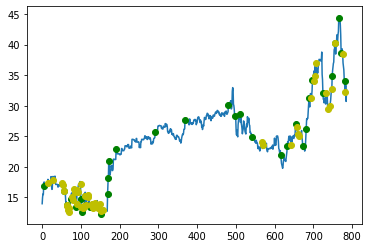

In [32]:
plt.plot(bars['c'])
plt.plot(bars.loc[idx]['c'], 'go')
plt.plot(bars.loc[idx2]['c'], 'yo')
plt.show()

In [52]:
from engine.trade_tester import getDailyVolatility, ApplyStopLossProfitTaking

# some 'ts' will be shared, not unique, across neighboring bars. Make a copy, pick the first unique entry, and strip out the rest
df1 = bars.copy(deep=True)
df1 = df1.iloc[df1['ts'].searchsorted(df1['ts'].unique())]
df1.index = pd.to_datetime(df1['ts'], unit='s')

days, std = getDailyVolatility(df1['c'], span0=20)

vol = pow(std.mean(), 0.5) # use the square-root of the mean of the daily standard deviation of prices.
print('volatility estimated, {}: {}'.format(SYMBOL, vol))

volatility estimated, CERE: 0.1986413731135984


In [57]:
# get timestamp of each entry from idx
idx0 = idx + idx2

times = pd.to_datetime(bars.loc[idx0]['ts'], unit='s')
times

t
4     2020-12-04 20:21:00
57    2021-01-04 20:39:00
63    2021-01-20 20:59:00
74    2021-02-08 20:37:00
87    2021-03-03 20:22:00
              ...        
743   2021-10-04 14:10:00
748   2021-10-11 20:00:00
757   2021-10-25 19:10:00
776   2021-11-15 20:56:00
782   2021-11-22 21:00:00
Name: ts, Length: 88, dtype: datetime64[ns]

In [62]:
# calculate trades on raw bars, not volume weighted ones.
bars = GetBars(SYMBOL, sample_factor=1, bar_type='raw', resolution=1)
bars['ts'] = pd.to_datetime(bars['t'], unit='s')
bars.index = bars['ts']
len(bars)

47242

In [60]:
from datetime import datetime
events = []
for d in times:
    events.append({'open': datetime(d.year,d.month,d.day,15,30), 'days': 7, 'trgt': 5})
events = pd.DataFrame(events)
# events = pd.DataFrame([{'open': datetime(2021,11,12,15,30), 't1': 7, 'trgt': 100.0}, \
# 	{'open': datetime(2021,11,19,14,30), 't1': 7, 'trgt': 100.0}, \
# 	{'open': datetime(2021,11,16,15,5), 't1': 7, 'trgt': 100.0}])
len(events)

88

In [63]:
res = ApplyStopLossProfitTaking(bars['c'], events, vol, -vol * 0.5)

In [67]:
for idx, row in res.iterrows():
    print(row)

open    2020-12-04 15:30:00
days                      7
trgt                      5
end                   15.17
o                     15.76
sl      2020-12-04 17:05:00
pt      2020-12-07 14:45:00
Name: 0, dtype: object
open    2021-01-04 15:30:00
days                      7
trgt                      5
end                   16.36
o                     16.86
sl      2021-01-04 15:58:00
pt                      NaT
Name: 1, dtype: object
open    2021-01-20 15:30:00
days                      7
trgt                      5
end                   14.22
o                     14.75
sl      2021-01-20 19:37:00
pt                      NaT
Name: 2, dtype: object
open    2021-02-08 15:30:00
days                      7
trgt                      5
end                  15.075
o                     14.02
sl                      NaT
pt      2021-02-09 19:43:00
Name: 3, dtype: object
open    2021-03-03 15:30:00
days                      7
trgt                      5
end                    14.5
o           